<a href="https://colab.research.google.com/github/Kaushaljha488/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Kaushal_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


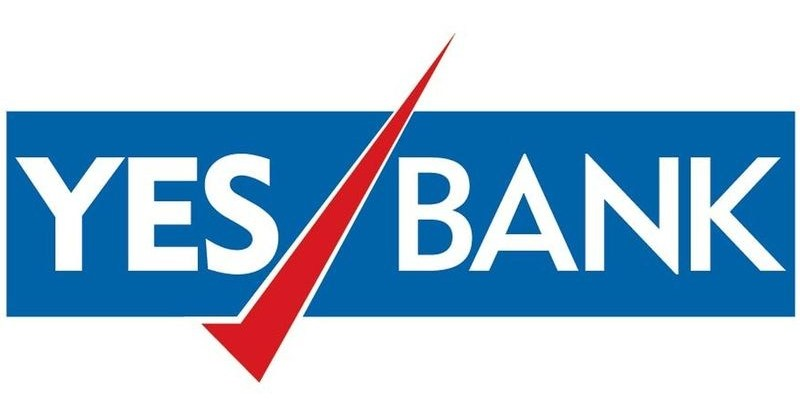
---



# **Project Description**

**Bussiness Context:**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

**Lets Start With Importing All Important Libraries** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')


# **Loading our Dataset**

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading dataset csv file using panda
path="/content/drive/MyDrive/ALMABETTER/ML capstone Regression/data_YesBank_StockPrices.csv"
df=pd.read_csv(path)

**Dataset is now successfully loaded**.

# **Understanding of Dataset**

In [4]:
#Checking first 5 rows of dataset using head()method
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
#Checking last 5 rows using tail()method
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
#Checking the shape of dataset
df.shape

(185, 5)

**From above it is clear that in our data set contains 185 rows and 5 columns**

In [7]:
#Lets check the column name and data type in each column using info() method
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# **DataSet Information**

**Date**:The date of record finalizes the transfer of the stock's ownership.

**Open**: Open Price is the price at which the financial security opens in the market when trading begins. It may or may not be different from the previous day's closing price. The security may open at a higher price than the closing price due to excess demand of the security.

**High**:High is the highest price at which a stock traded during a period.

**Low**:Low is the highest price at which a stock traded during a period.

**Close**:The closing price of a stock is the price at which the share closes at the end of trading hours of the stock market.


In [8]:
#Checking the description of data in dataset using describe()method
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


# **DATA CLEANING**

**1.Null value Treatment**

**2.Check Duplicates**

**3.Data format Correction**

In [9]:
#Lets find Null values in DataSet
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**So there is no null value in our Dataset**

In [10]:
#Lets check for duplicate values
len(df[df.duplicated()])

0

**Excellent, there is not any duplicate data in our dataset.**

In [11]:
#Now lets check the data type of dataset
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [12]:
df['Date'].head()

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

**As Date is in format of MM-YY, so we have to convert it in correct format of YYYY-MM-DD using strptime of the datetime library.**

In [13]:
#Lets convert Date into correct format
from datetime import datetime
df['Date']=df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [14]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [15]:
df['Date'].head()

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]

**As from above, we can see that Date column of DataSet is successfully converted into correct format.**

Now we have a cleaned DataSet so we can proceed with visualisation part. 

# **EXPLORATORY DATA ANALYSIS(EDA)**

# **Univariate Analysis**

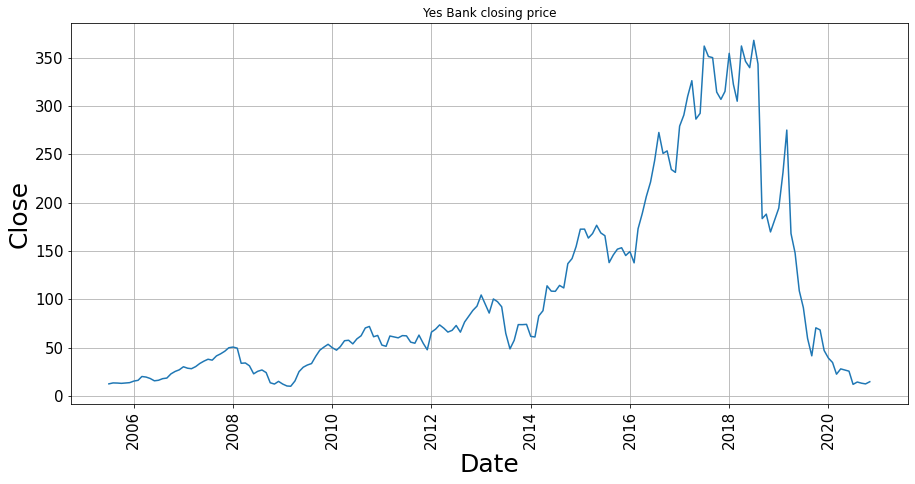

In [16]:
#Lets check the trend of our target variable(Closing)
plt.figure(figsize=(15,7))                    #Setting the figure size
sns.lineplot(x='Date',y='Close',data=df).set(title='Yes Bank closing price')      # Close vs year
plt.xlabel('Date',fontsize=25)                #Labelling
plt.ylabel('Close',fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

From above graph it is clear that, trend was continuously increasing from 2009 till 2018. After 2018 it started to decrease due to fraud case of Rana Kapoor

# **Dependent Variable-Close(Closing Price of Stock)**

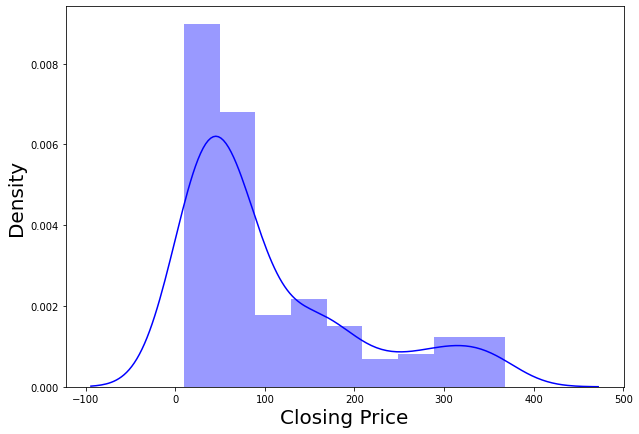

In [17]:
#Target/Dependent variable-'Close'
plt.figure(figsize=(10,7))
sns.distplot(df['Close'],color="b")
plt.xlabel('Closing Price',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

From above it is clear that distribution is **right skewed** so we have to do **transformatiom** to make it **Normal** using **log transformation** method.

**Log Transformation**: Log transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. 

In this transform, we take the log of the values in a column and use these values as the column instead.

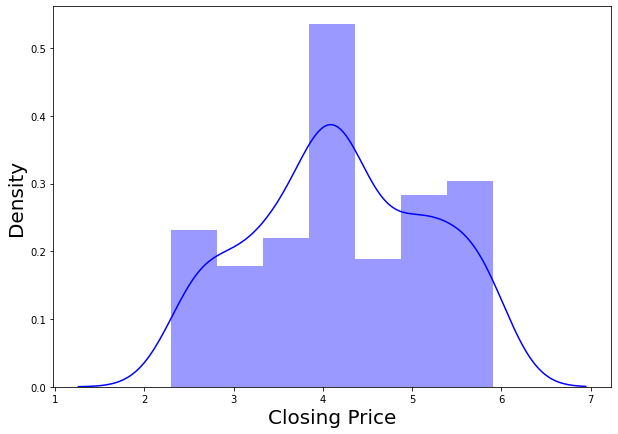

In [18]:
#Applying log transformation on target variable 
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Close']),color="b")
plt.xlabel('Closing Price',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

**Now our Target/Depndent variable close have normal distribution.**

In [19]:
#Collecting all our numeric column in a new variable 
numeric_features=df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# **Checking the Mean, Median for all independent variable using barplot.**

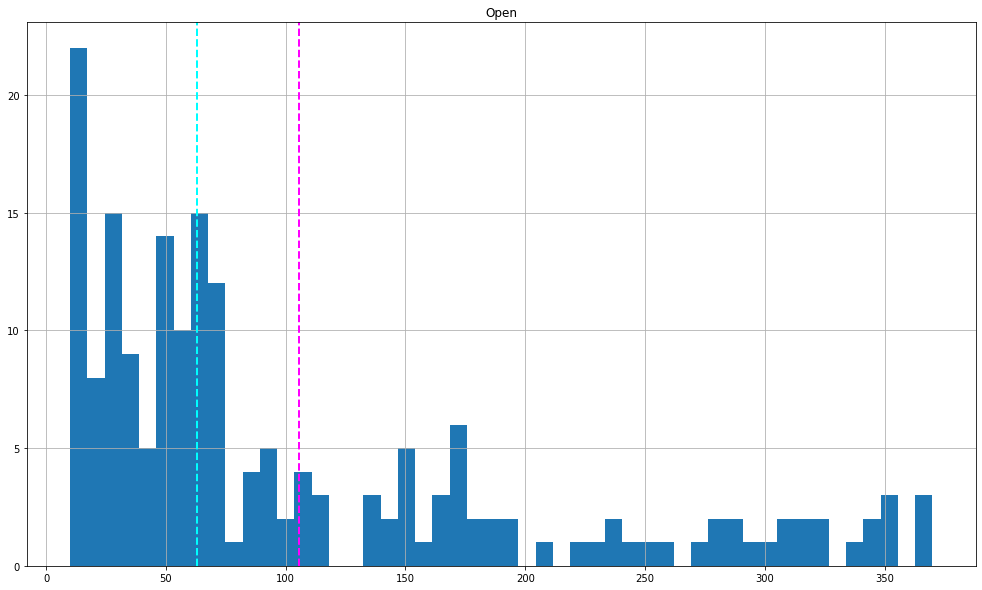

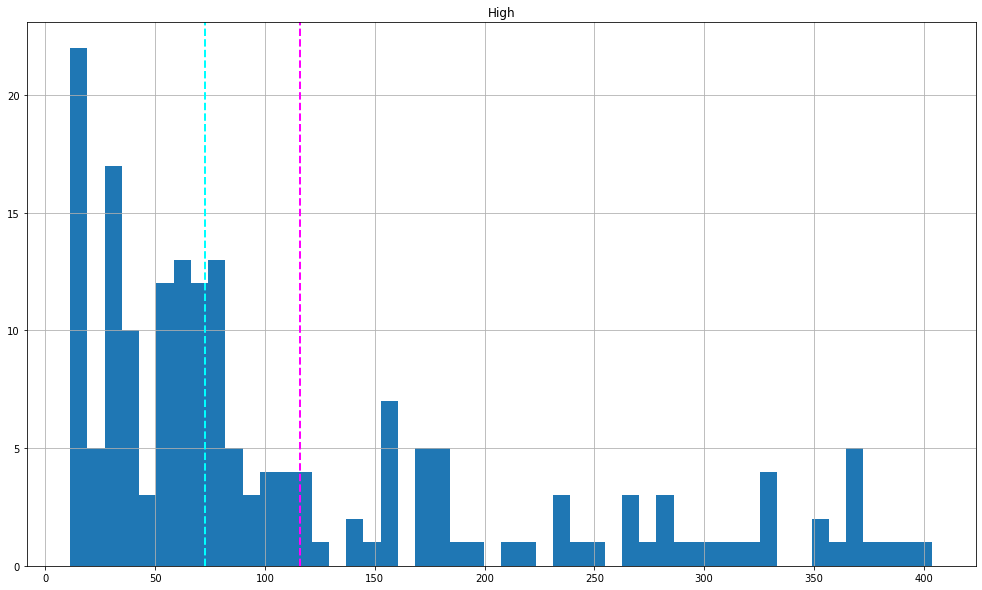

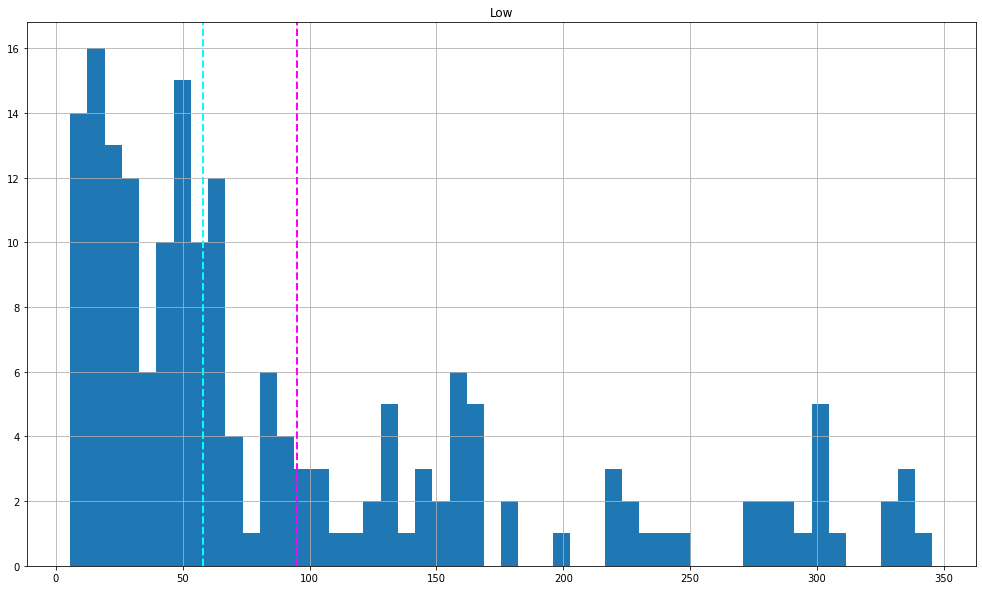

In [20]:
#Ploting bar blot for each independent variable
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(17, 10))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**From above graph we can see that there is much difference in between mean and median for all independent variable. It means independent variables are not normally distributted.**

# **We will check distribution using distplot for all our independent variables.**

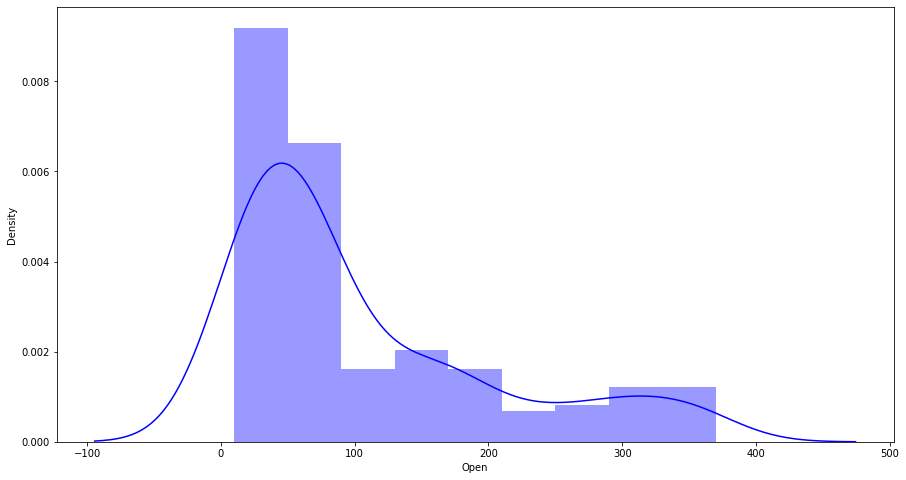

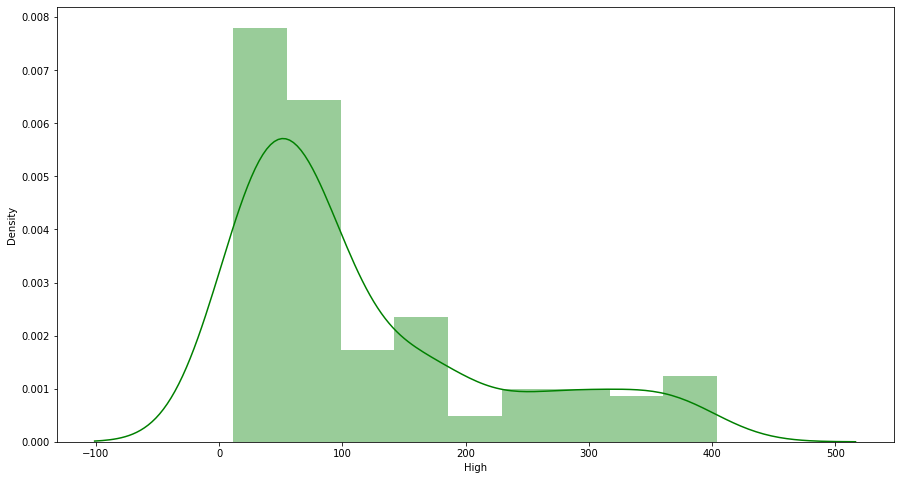

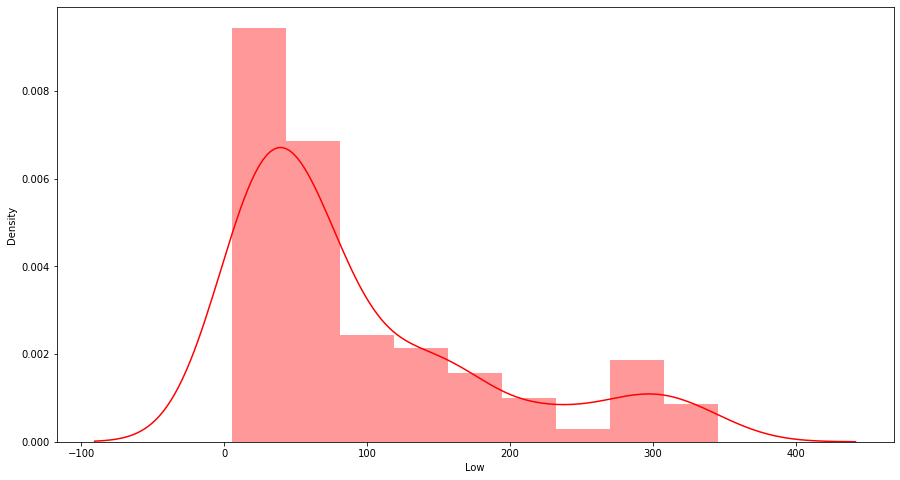

In [21]:
#Distribution of indeoendt variable
plt.figure(figsize=(15,8))
sns.distplot(df['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(df['High'], color='green')

plt.figure(figsize=(15,8))
sns.distplot(df['Low'], color='red')

plt.show()

**So independent varaibles of our dataset have right skwed distribution.**
**Again we have to use log transformation to make in normal.**

# **Applying Log Transformation on Independent Variables**

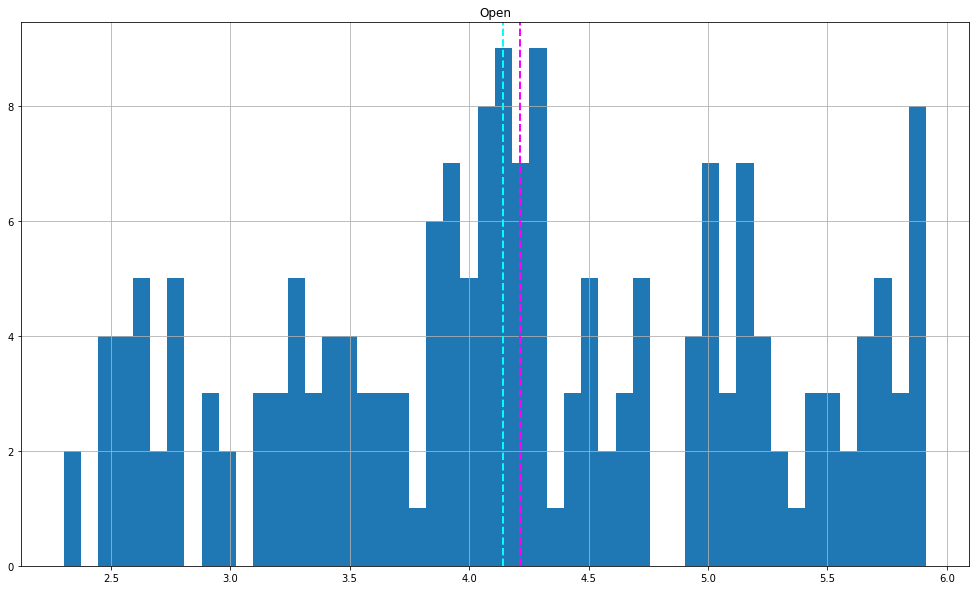

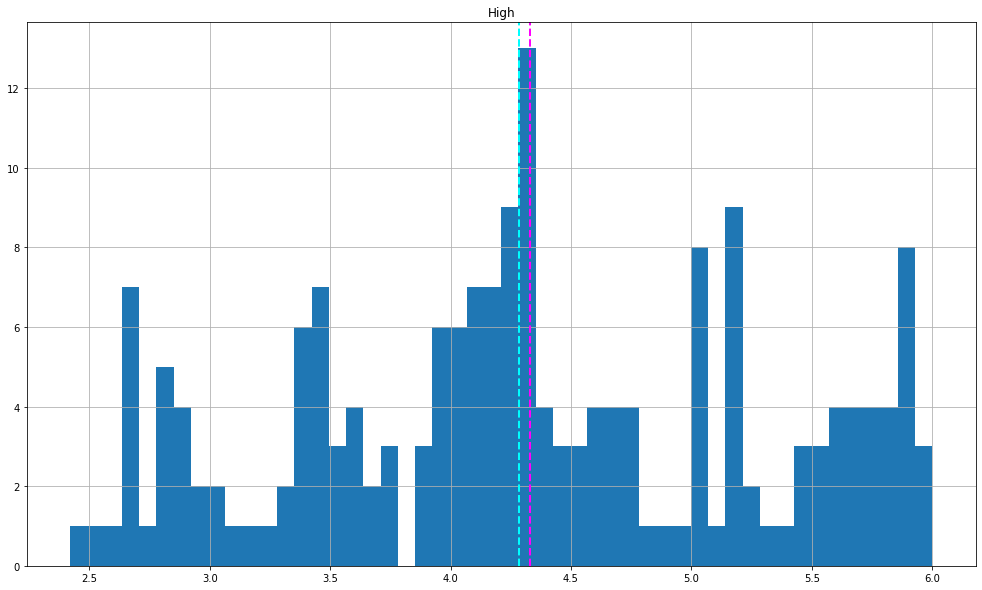

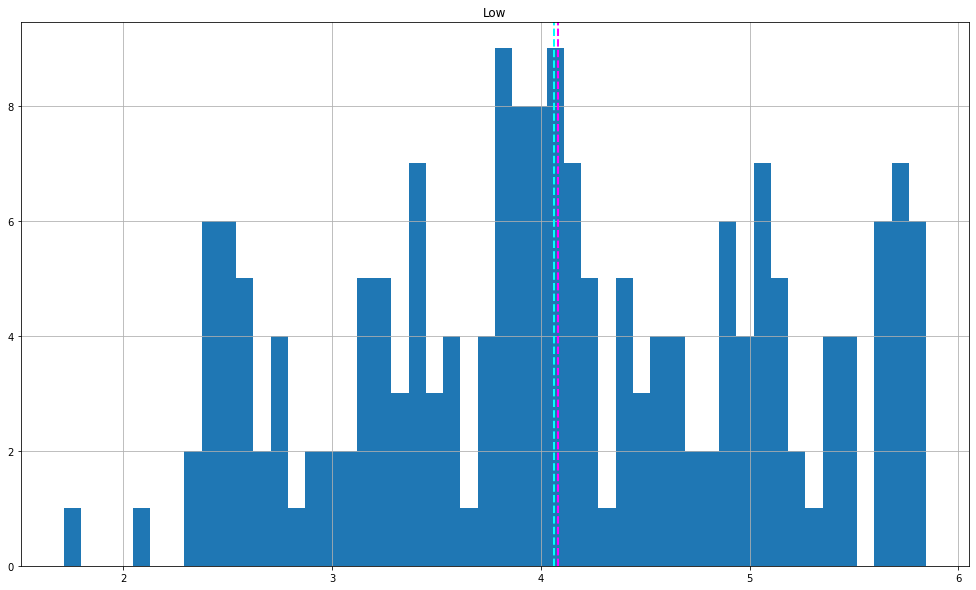

In [22]:
#Applying log transformation
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(17, 10))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

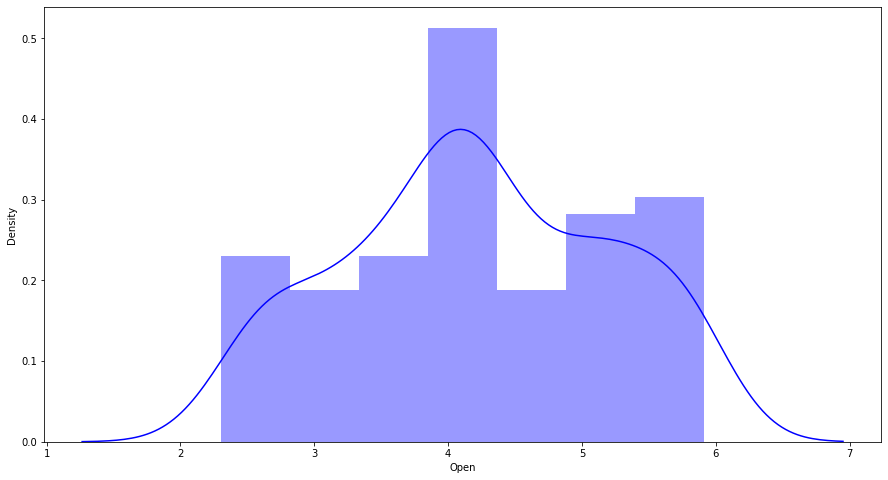

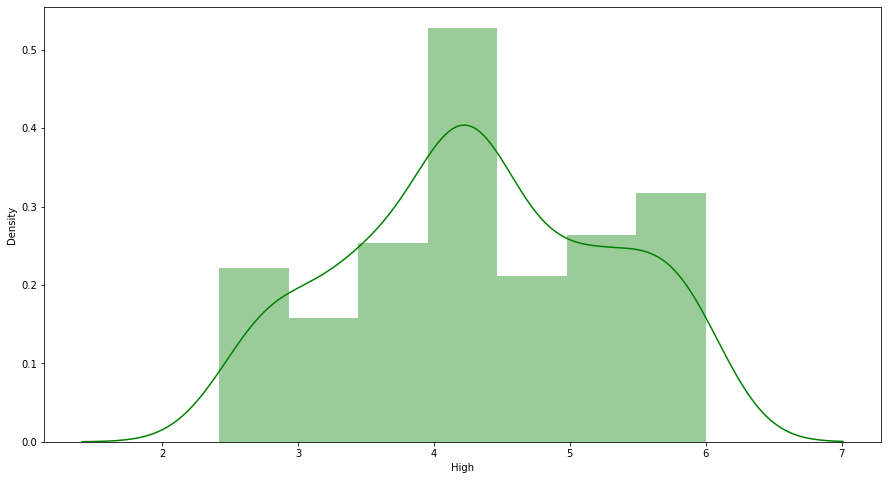

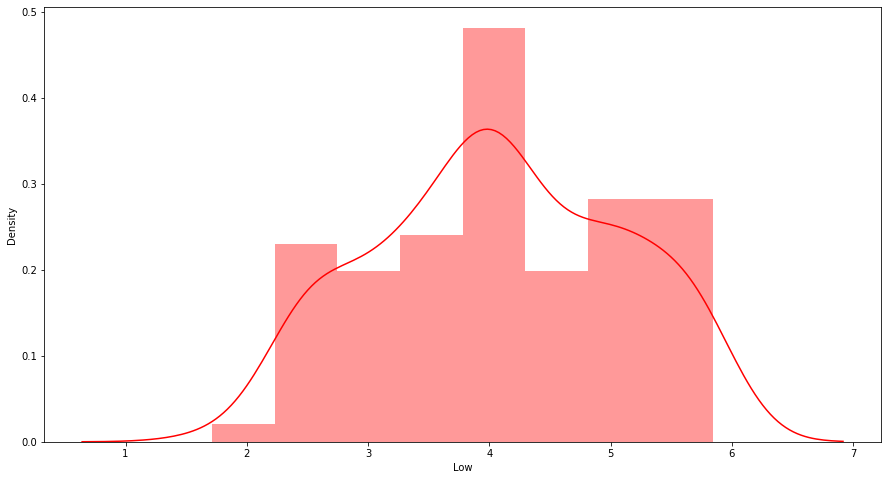

In [23]:
#Applying log transformation and checking distribution of independent variables.
plt.figure(figsize=(15,8))
sns.distplot(np.log(df['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log(df['High']), color='green')

plt.figure(figsize=(15,8))
sns.distplot(np.log(df['Low']), color='red')

plt.show()

**After applying log transformation distribution of all independent variables coverted to almost Normal distribution.**

# **Bivariate Analysis**

**Now we will see the relation between dependent and independent variables using scatter plot and Heatmap**

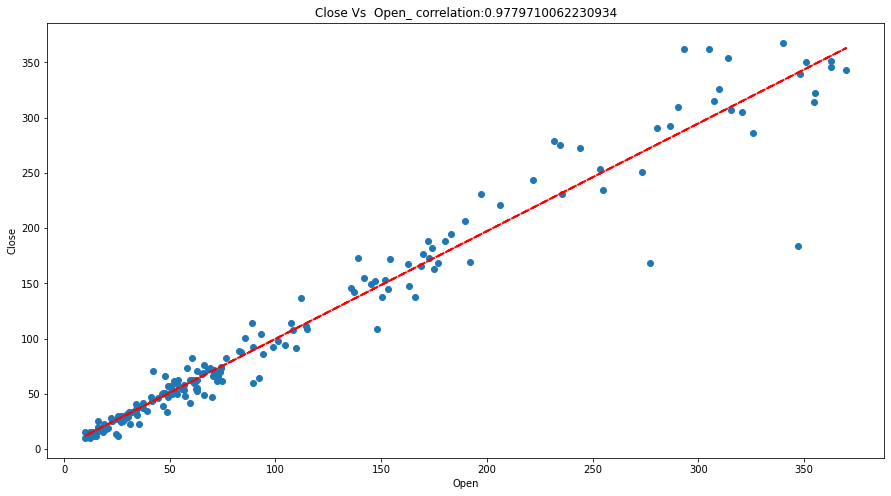

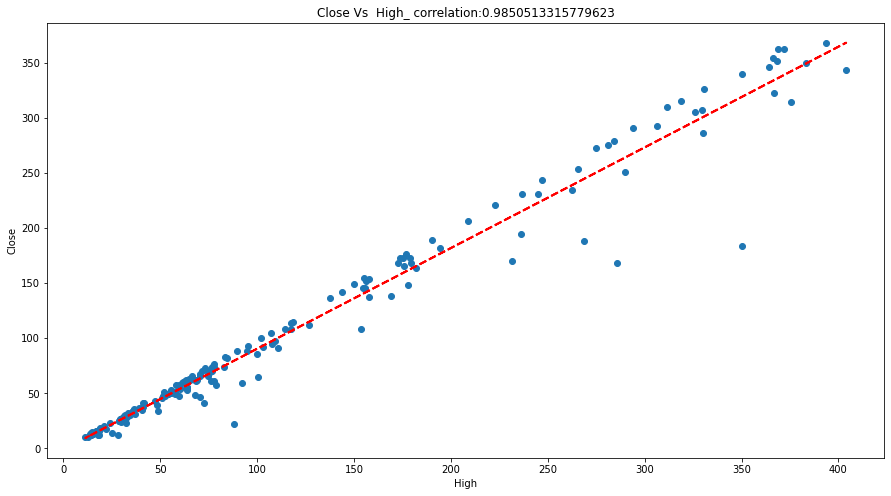

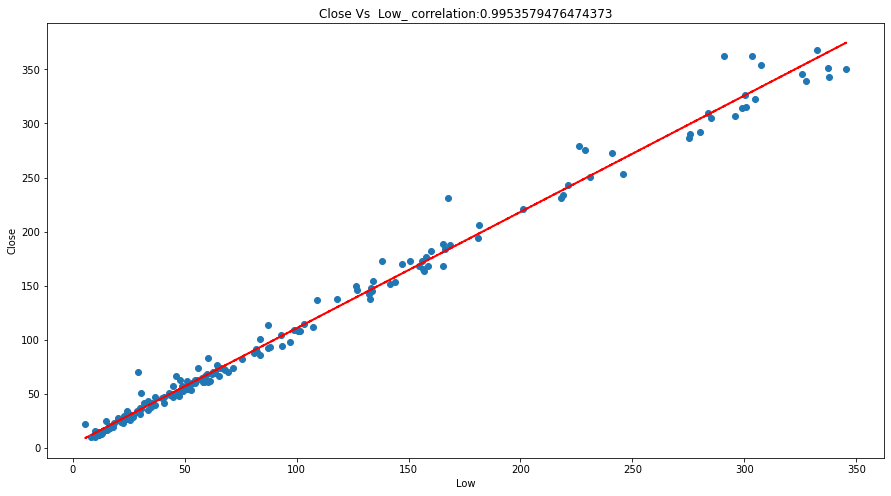

In [24]:
#Using scatter plot
for col in numeric_features[:-1]:
  fig = plt.figure(figsize = (15,8))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Close Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

**From above it is clear that all independent variables are highly correlated with our dependent/target variable so we will not drop any column.**

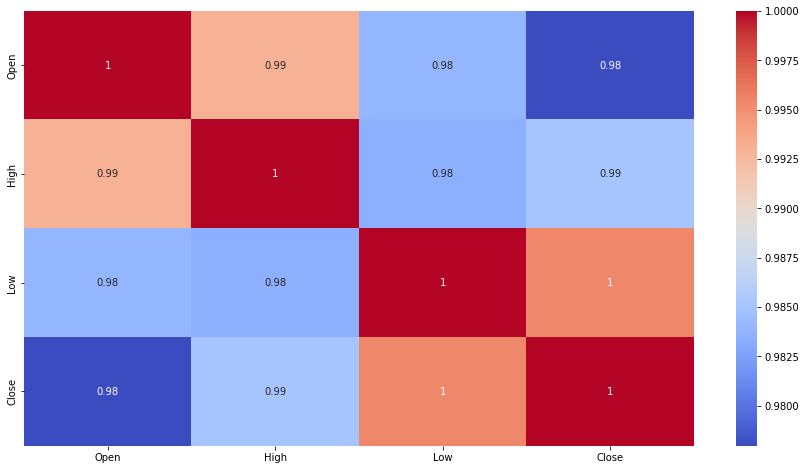

In [25]:
#Checking Correlation using heatmap
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')
plt.show()

**All independent variable is showing high relation with target/dependent variable.**

# **Multicollinearity**

Multicollinearity is a statistical concept where several independent variables in a model are correlated.

**Checking Multicollinearity using VIF(Variance Inflation Factor)**

**Variance Inflation Factor(VIF)**:
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. 
A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [26]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [27]:
#Checking VIF without Date and Open features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])


,variables,VIF
0,High,62.598129
1,Low,62.598129


In [28]:
#Checking VIF without Date and High features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [29]:
#Checking VIF without Date and Low features
calculate_vif(df[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


 

1.   Since we have checked VIF with dropping each features(Open,High & Low) one by one,better result of VIF was when we dropped 'Open' which was also realtively high.
2.   Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we are not going to dropp any column.

3.  As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model. 
4. Finally we will not dropp any column and will try to predict result and will see how model is performing with multicollinearity.


 

# **Model Building**

**We will build total 5 regression models for our DataSet**

1. Linear Regression
2. Lasso Regression(L1 Regularization)
3. Ridge Regression(L2 Regularization)
4. Elastic Net Regression(L1+L2)
5. XG Boost Regression

**Lets Split Our Dataset In Two Parts:**
1. Independent Variabes(x)
2. Dependent variable(y)

In [30]:
#Spliting our data into Independent and Dependent variable
X=df.drop(columns=['Date','Close']).apply(zscore)
y=np.log10(df['Close'])

# **Train Test Split**

1. The train_test_split() method is used to split our data into train and test sets. 
2.  **Train set**: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.
3.  **Test set**: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.

In [31]:
#Creating Trainig and Testing set of our dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('Shape of X_train Set:',X_train.shape)
print('Shape of X_test Set:',X_test.shape)
print('Shape of y_train Set:',y_train.shape)
print('Shape of y_test Set:',y_test.shape)

Shape of X_train Set: (148, 3)
Shape of X_test Set: (37, 3)
Shape of y_train Set: (148,)
Shape of y_test Set: (37,)


# **1. Linear Regression**
**Linear regression** is a popular and uncomplicated algorithm used in data science and machine learning. It's a supervised learning algorithm and the simplest form of regression used to study the mathematical relationship between variables.

In [32]:
regressor=LinearRegression()
regressor_model=regressor.fit(X_train,y_train)

In [33]:
#Checking the training accuracy of model
round(regressor.score(X_train,y_train),2)

0.81

In [34]:
#Checking the testing accuracy of model
round(regressor.score(X_test,y_test),2)

0.83

In [35]:
regressor.intercept_

1.8262354887187733

In [36]:
regressor.coef_

array([-0.13212634,  0.2897523 ,  0.2329089 ])

In [37]:
y_pred=regressor.predict(X_test)
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])

# **Evaluation Metrics**

**Evaluation metrics** are used to measure the quality of the statistical or machine learning model.
There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:
1. MSE(Mean Squared Error)
2. RMSE(Root Mean Squared Error)
3. MAE(Mean Absolute Error)
4. MAPE(Mean Absolute Percentage Error)
5. r2 score(R-Squared)

In [38]:
#Checking the Test performance of Linear Regression Model.
print('MSE value is :', round(mean_squared_error(y_test,y_pred),4))
print('RMSE value is:',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('MAE value is:',round(mean_absolute_error(y_test,y_pred),4))
print('MAPE value is:',round(mean_absolute_percentage_error(y_test,y_pred),4))
print('r2 score is:',round(r2_score(y_test,y_pred),4))


MSE value is : 0.032
RMSE value is: 0.1788
MAE value is: 0.1457
MAPE value is: 0.087
r2 score is: 0.8283


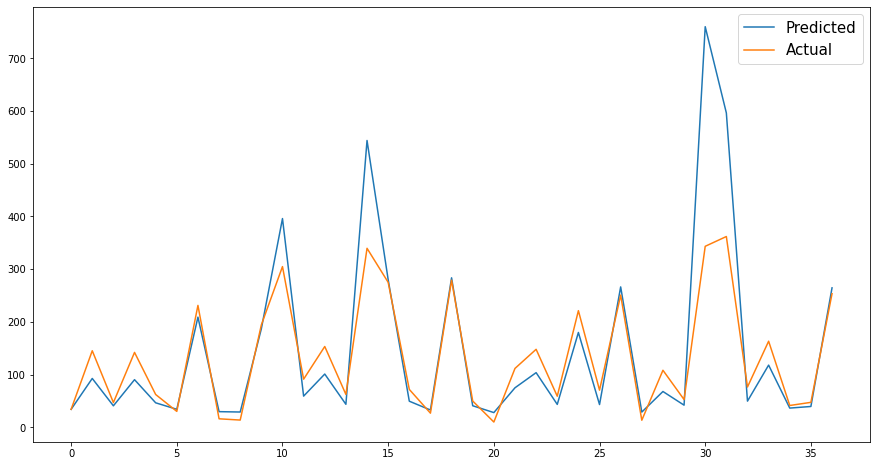

In [39]:
#Visuallizing actual vs predicted 
plt.figure(figsize=(15,8))
plt.plot(10**(y_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.show()


# **2.Lasso Regression**

*  Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 
*   Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. 

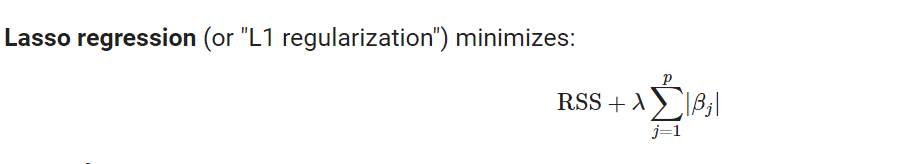

1. A tiny  λ  imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
2. Increasing  λ  penalizes the coefficients and thus shrinks them towards zero.



In [40]:
#Implementing Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [41]:
#Checking Training accuracy of Lasso Regression
round(lasso.score(X_train,y_train),2)

0.81

In [42]:
#Prediction
y_lasso_pred=lasso.predict(X_test)
y_lasso_pred

array([1.53982342, 1.97823908, 1.62548116, 1.95767329, 1.66470081,
       1.53363719, 2.32235872, 1.47847238, 1.46876749, 2.22294858,
       2.60987119, 1.7861935 , 2.00758923, 1.64592601, 2.74703432,
       2.40692503, 1.69761173, 1.51956762, 2.40621156, 1.61707252,
       1.45236177, 1.87145393, 2.01588969, 1.63777358, 2.24657485,
       1.60904717, 2.4268988 , 1.46756076, 1.83540354, 1.6337909 ,
       2.86112163, 2.69976573, 1.69183981, 2.07683305, 1.56527003,
       1.60275375, 2.4195457 ])

In [43]:
#Checking the test performance of Lasso Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_lasso_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_lasso_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_lasso_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_lasso_pred),4))
print("r2 score is :",round(r2_score(y_test, y_lasso_pred), 4))

MSE value is : 0.0316
RMSE value is : 0.1778
MAE value is : 0.1463
MAPE value is : 0.0876
r2 score is : 0.8303


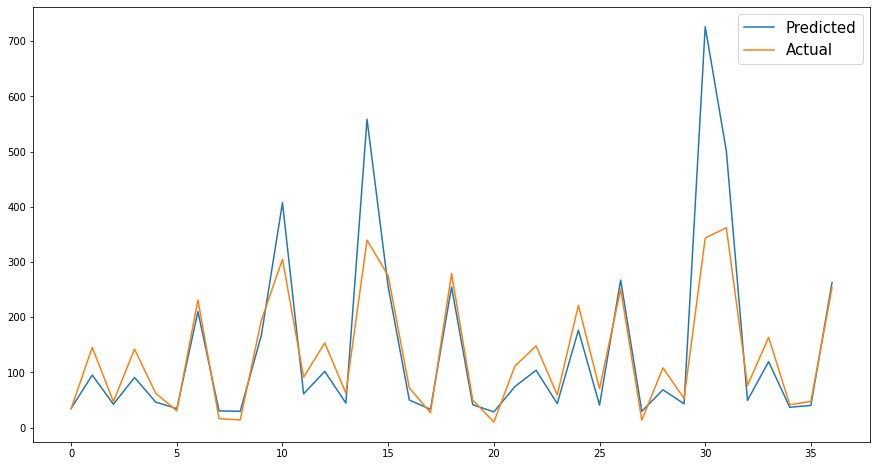

In [44]:
#Plotting Actual vs Predicted for Lasso Regression
plt.figure(figsize=(15,8))
plt.plot(10**y_lasso_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.show()

# **Cross-Validation**

Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models by dividing data into two segments: one used to learn or train a model and the other used to validate the model.If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
It is also a re-sampling procedure used to evaluate a model if we have a limited data.


**Implementing Cross-Validation on Lasso**

In [45]:
#Hyperparameter of Tunning
from sklearn.model_selection import GridSearchCV
lasso_cv=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso_cv,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.035688728899261


In [47]:
#Prediction
y_lasso_pred1=lasso_regressor.predict(X_test)
y_lasso_pred1

array([1.54344655, 1.97574886, 1.62792097, 1.95546498, 1.66658191,
       1.53734661, 2.31506742, 1.48294886, 1.47337939, 2.21706107,
       2.59857361, 1.786389  , 2.0046854 , 1.64806852, 2.73381171,
       2.39846747, 1.69903218, 1.52347191, 2.39776704, 1.61961931,
       1.45720363, 1.87045394, 2.01288734, 1.64002954, 2.24033887,
       1.61172638, 2.41816589, 1.47218926, 1.83490372, 1.63610595,
       2.84633038, 2.68723576, 1.69334389, 2.07296877, 1.56853742,
       1.60549805, 2.41089359])

In [48]:
#Test performance of Lasso after Cross-Validation
print("MSE value is :",round(mean_squared_error(y_test, y_lasso_pred1), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_lasso_pred1)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_lasso_pred1),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_lasso_pred1),4))
print("r2 score is :",round(r2_score(y_test, y_lasso_pred1), 4))

MSE value is : 0.0315
RMSE value is : 0.1775
MAE value is : 0.1459
MAPE value is : 0.0877
r2 score is : 0.8308


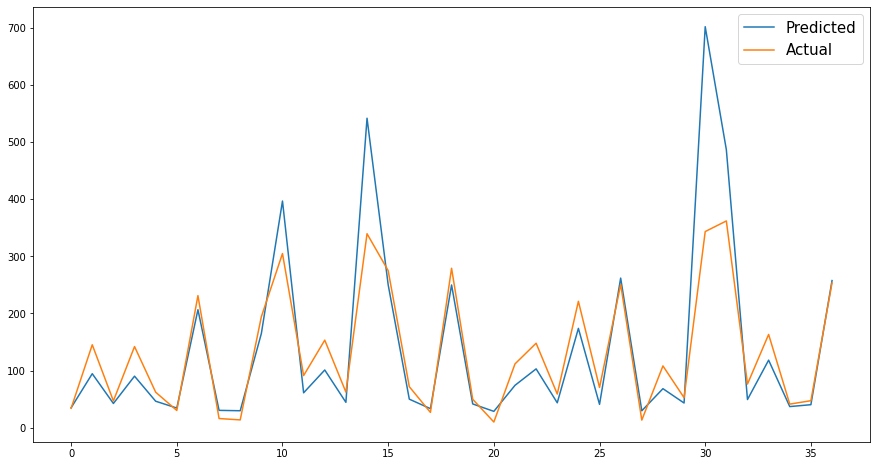

In [49]:
#Plotting Actual vs Predicted for Lasso after Cross-Validation
plt.figure(figsize=(15,8))
plt.plot(10**y_lasso_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.show()


# **3.Ridge Regression**
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

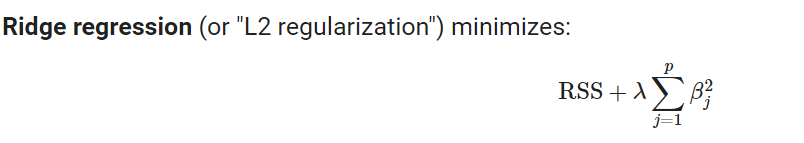

1. A tiny  λ  imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
2. Increasing  λ  penalizes the coefficients and thus shrinks them towards zero.

In [50]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)


Ridge(alpha=0.1)

In [51]:
#Checking the training accuracy of Ridge Regression
round(ridge.score(X_train,y_train),2)

0.81

In [53]:
#Prediction
y_ridge_pred=ridge.predict(X_test)
y_ridge_pred

array([1.5334622 , 1.96922127, 1.61250463, 1.95665066, 1.66639979,
       1.53267972, 2.32162939, 1.47283889, 1.46256774, 2.26399758,
       2.60150464, 1.77432706, 2.00545486, 1.64069108, 2.73980868,
       2.44149328, 1.69500926, 1.51615183, 2.44573491, 1.61227623,
       1.44606734, 1.8743713 , 2.01597983, 1.63755424, 2.25458459,
       1.62973976, 2.42679241, 1.46099548, 1.83266795, 1.62454272,
       2.87947192, 2.76400948, 1.69504053, 2.07329341, 1.56187277,
       1.5972619 , 2.42342024])

In [54]:
#Checking the test performance of Ridge Regression Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_ridge_pred), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_ridge_pred)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_ridge_pred),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_ridge_pred),4))
print("r2 score is :",round(r2_score(y_test, y_ridge_pred), 4))

MSE value is : 0.0319
RMSE value is : 0.1786
MAE value is : 0.1453
MAPE value is : 0.0869
r2 score is : 0.8288


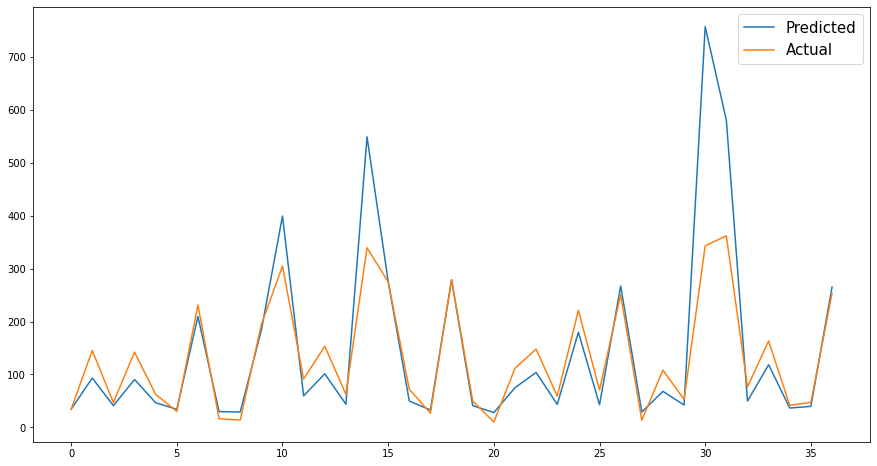

In [69]:
#Plotting Actual vs Predicted for Ridge Regression
plt.figure(figsize=(15,8))
plt.plot(10**y_ridge_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.show()

# **Implementing Cross-Validation on Ridge**

In [63]:
#CrossValidation 
#Hyperparameter of Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [64]:
print("The best fit alpha value is found out to be :",ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.03559106404507476


In [65]:
#Prediction after CV
y_ridge_pred1=ridge_regressor.predict(X_test)
y_ridge_pred1

array([1.53685109, 1.97890367, 1.62336467, 1.95852668, 1.66344078,
       1.53105213, 2.32657126, 1.47489651, 1.46506572, 2.23070238,
       2.61615325, 1.78538915, 2.00882057, 1.64391416, 2.75389879,
       2.41549977, 1.69619106, 1.51658252, 2.41536176, 1.61495446,
       1.44857737, 1.87222063, 2.01836956, 1.63608468, 2.25075001,
       1.61011666, 2.43301121, 1.46380564, 1.83524698, 1.63153741,
       2.8723522 , 2.71396422, 1.69102192, 2.07885344, 1.56271006,
       1.60032936, 2.42466269])

In [66]:
#Checking the test performance of Ridge Regression after CrossValidation Using Evaluation MAtrics
print("MSE value is :",round(mean_squared_error(y_test, y_ridge_pred1), 4))
print("RMSE value is :",round(math.sqrt(mean_squared_error(y_test, y_ridge_pred1)),4))
print("MAE value is :",round(mean_absolute_error(y_test, y_ridge_pred1),4))
print("MAPE value is :",round(mean_absolute_percentage_error(y_test, y_ridge_pred1),4))
print("r2 score is :",round(r2_score(y_test, y_ridge_pred1), 4))

MSE value is : 0.0317
RMSE value is : 0.1781
MAE value is : 0.1464
MAPE value is : 0.0874
r2 score is : 0.8298


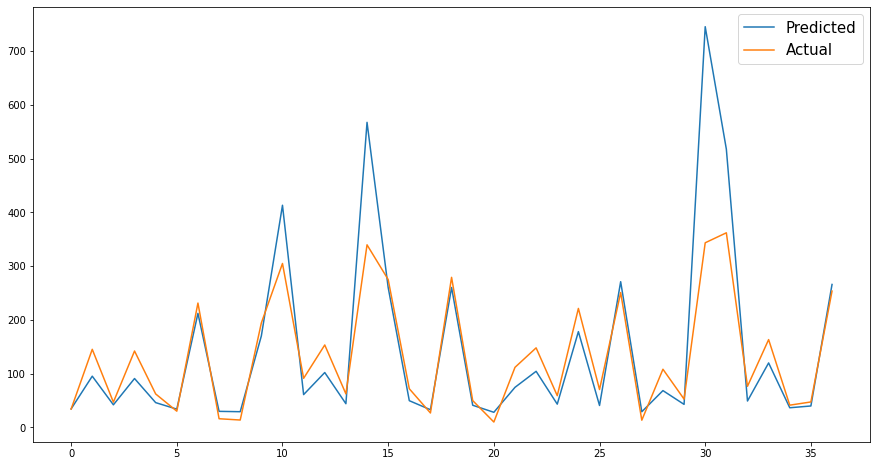

In [67]:
#Plotting Actual vs Predicted for Ridge Regression after CrossValidation
plt.figure(figsize=(15,8))
plt.plot(10**y_ridge_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.show()